In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/.DS_Store
../input/heart.csv
../input/iris/Iris.csv
../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
../input/classification-suv-dataset/Social_Network_Ads.csv
../input/wine-reviews/.DS_Store
../input/wine-reviews/winemag-data-130k-v2.csv
../input/wine-reviews/winemag-data-130k-v2.json
../input/wine-reviews/winemag-data_first150k.csv
../input/random-linear-regression/test.csv
../input/random-linear-regression/train.csv
../input/svm-classification/SVM_Classification.R
../input/svm-classification/UniversalBank.csv
../input/svm-classification/Activity Sheet.docx
../input/house-prices-advanced-regression-techniques/test.csv
../input/house-prices-advanced-regression-techniques/data_description.txt
../input/house-prices-advanced-regression-techniques/train.csv
../input/house-prices-advanced-regression-techniques/sample_submission.csv
../input/mushroom-classification/mushrooms.csv
../input/titanic/.DS_Store
../input/titanic/test.csv
../input/titanic/train.csv
../i

In [2]:
DATA_PATH = '../input/mushroom-classification/'

In [3]:
file_path = os.path.join(DATA_PATH,'mushrooms.csv')

In [4]:
pd.set_option('display.max_columns',30)

In [5]:
df = pd.read_csv(file_path)

In [6]:
print(f'shape of csv file: {df.shape}')

shape of csv file: (8124, 23)


In [7]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   
2                      w         p          w           o         p   
3                      w         p          w           o         p   
4                      w         p          w           o         e   

  spore-print-color population habitat  
0                 k          s       u  
1                 n          n       g  
2                 n          n       m  
3                 k          s       u  
4                 n          a       g

In [8]:
df.columns = ['target', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [9]:
for i in df.columns:
    print(f'{i} -> {df[i].unique()}')

target -> ['p' 'e']
cap-shape -> ['x' 'b' 's' 'f' 'k' 'c']
cap-surface -> ['s' 'y' 'f' 'g']
cap-color -> ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises -> ['t' 'f']
odor -> ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment -> ['f' 'a']
gill-spacing -> ['c' 'w']
gill-size -> ['n' 'b']
gill-color -> ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape -> ['e' 't']
stalk-root -> ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring -> ['s' 'f' 'k' 'y']
stalk-surface-below-ring -> ['s' 'f' 'y' 'k']
stalk-color-above-ring -> ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring -> ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type -> ['p']
veil-color -> ['w' 'n' 'o' 'y']
ring-number -> ['o' 't' 'n']
ring-type -> ['p' 'e' 'l' 'f' 'n']
spore-print-color -> ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population -> ['s' 'n' 'a' 'v' 'y' 'c']
habitat -> ['u' 'g' 'm' 'd' 'p' 'w' 'l']


# Exploratory Data Analysis

In [10]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = pd.factorize(df[i])[0]

In [11]:
df.groupby(['cap-shape'])['target'].value_counts()

cap-shape  target
0          1         1948
           0         1708
1          1          404
           0           48
2          1           32
3          1         1596
           0         1556
4          0          600
           1          228
5          0            4
Name: target, dtype: int64

In [12]:
pd.crosstab(df['cap-shape'],df['target'])

target        0     1
cap-shape            
0          1708  1948
1            48   404
2             0    32
3          1556  1596
4           600   228
5             4     0

In [13]:
fig = px.violin(df,
          x = df['cap-shape'],
          y=df['target'])
fig.show()

In [14]:
fig = px.violin(df,
          x = df['cap-surface'],
          y=df['target'])
fig.show()

#### Feature selection

In [15]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import mutual_info_classif

In [16]:
y = df.target

In [17]:
df.drop('target',axis =1,inplace=True)

In [18]:
x = df

In [19]:
vrt = VarianceThreshold(threshold=0.01)
vrt.fit(x,y)

VarianceThreshold(threshold=0.01)

In [20]:
sum(vrt.get_support())

21

In [21]:
X = vrt.transform(df)

In [22]:
chi2_selector = SelectKBest(chi2, k=11)
X_kbest = chi2_selector.fit_transform(X, y)

In [23]:
X_kbest.shape

(8124, 11)

In [24]:
mut_feat = mutual_info_classif(X_kbest,y)

In [25]:
mut_feat

array([0.13907235, 0.62900945, 0.06745967, 0.15712949, 0.28660248,
       0.09101409, 0.19320495, 0.18315584, 0.18163097, 0.2221557 ,
       0.33984344])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_kbest,y,test_size=0.15,random_state=1)

In [28]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [29]:
lr.score(X_train,y_train)

0.9714699493120927

In [30]:
cross_val_score(lr,X_train,y_train,cv=5)

array([0.97103548, 0.96017379, 0.96813903, 0.97465605, 0.95727734])

In [31]:
lr.score(X_test,y_test)

0.9680065627563577

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(max_features=9,max_depth=5,n_estimators=10)

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=9, n_estimators=10)

In [35]:
rf.score(X_train,y_train)

0.9991310644460536

In [36]:
cross_val_score(rf,X_train,y_train,cv=5)

array([0.99782766, 0.99927589, 0.99855177, 1.        , 1.        ])

In [37]:
rf.feature_importances_

array([0.00273131, 0.8446005 , 0.        , 0.02068408, 0.        ,
       0.00367627, 0.03845253, 0.        , 0.00989048, 0.00953198,
       0.07043286])

In [38]:
rf.score(X_test,y_test)

0.9983593109105825

In [39]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc

In [40]:
y_pred = rf.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       615

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [42]:
roc_auc_score(y_test,y_pred)

0.9983443708609271

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

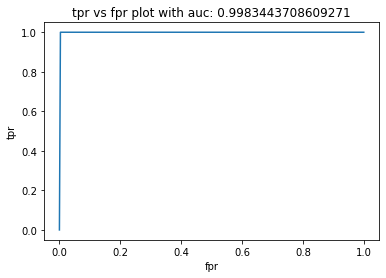

In [44]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'tpr vs fpr plot with auc: {roc_auc_score(y_test,y_pred)}')
plt.show()